In [100]:
#IMPORTS
%run ../datuslib.ipynb

In [101]:
#SETTINGS
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [149]:
#CARGA DATA

A_tweets = pd.read_csv(generateAbsolutePath("train.csv", exists = True))

# ANALIZANDO COMO ES LA DISTRIBUCION DE DESASTRES AGRUPANDO LOS KEYWORDS COMO EN TEMAS O CATEGORIAS

In [150]:
#SE LIMPIA UN POCO LA DATA DE KEYWORDS (muchos tienen keywords con un caracter '%20' mezclado)
A_tweets = A_tweets.dropna()
A_tweets['keyword'] = A_tweets.apply(lambda row : ' '.join(str(row['keyword']).split('%20')), axis = 1)
A_tweets['target'] = A_tweets.apply(lambda row : mapBinaryLabel(row['target'],['Disaster', 'Non Disaster']), axis = 1)

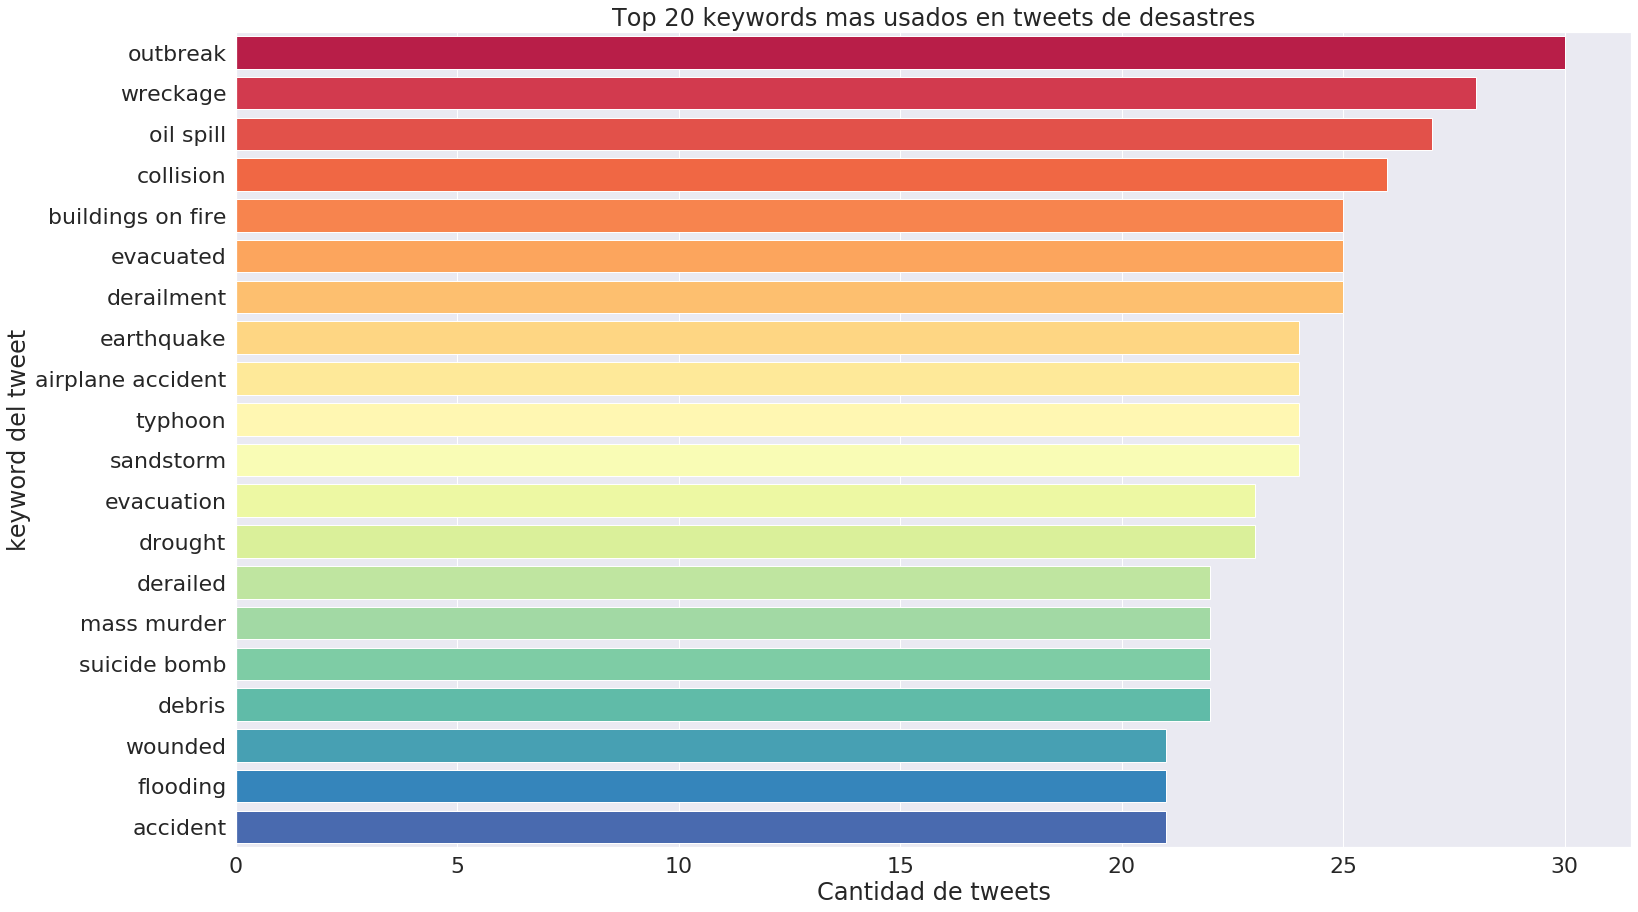

In [155]:
#SE MIRAN LOS KEYWORDS DE DESASTRES MAS USADOS

A_disasterKeywordsFrecs = A_tweets[A_tweets['target'] == 'Disaster'].groupby('keyword').count().reset_index()[['keyword','text']].rename( columns = {'text':'amount'})
A_disasterKeywordsFrecs = A_disasterKeywordsFrecs.sort_values('amount', ascending = False)

barplot(y = 'keyword', x = 'amount', data = A_disasterKeywordsFrecs.head(20),
        xLabel = 'Cantidad de tweets',yLabel = 'keyword del tweet',
        title = 'Top 20 keywords mas usados en tweets de desastres', figY = 15,
        fontSize = 2)


In [104]:
#SE VISUALIZAN LOS KEYWORDS USADOS EN LOS TWEETS

A_keywordsDF = A_tweets.groupby('keyword').count().sort_values('target', ascending = False).reset_index()
A_keywords = set(mergeListOfLists([k.split('%20') for k in list(A_keywordsDF['keyword'])]))
A_keywords

{'ablaze',
 'accident',
 'aftershock',
 'airplane accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon',
 'army',
 'arson',
 'arsonist',
 'attack',
 'attacked',
 'avalanche',
 'battle',
 'bioterror',
 'bioterrorism',
 'blaze',
 'blazing',
 'bleeding',
 'blew up',
 'blight',
 'blizzard',
 'blood',
 'bloody',
 'blown up',
 'body bag',
 'body bagging',
 'body bags',
 'bomb',
 'bombed',
 'bombing',
 'bridge collapse',
 'buildings burning',
 'buildings on fire',
 'burned',
 'burning',
 'burning buildings',
 'bush fires',
 'casualties',
 'casualty',
 'catastrophe',
 'catastrophic',
 'chemical emergency',
 'cliff fall',
 'collapse',
 'collapsed',
 'collide',
 'collided',
 'collision',
 'crash',
 'crashed',
 'crush',
 'crushed',
 'curfew',
 'cyclone',
 'damage',
 'danger',
 'dead',
 'death',
 'deaths',
 'debris',
 'deluge',
 'deluged',
 'demolish',
 'demolished',
 'demolition',
 'derail',
 'derailed',
 'derailment',
 'desolate',
 'desolation',
 'destroy',
 'des

In [105]:
#SE CLASIFICAN LOS KEYWORDS USADOS POR TEMAS (A MANO)

A_keywordsCategoriesMap = {
'PEOPLE':[
'fatalities',
'harm',
'body',
'evacuate',
'fear',
'famine',
'deaths',
'drowned',
'upheaval',
'injury',
'panic',
'pandemonium',
'quarantined',
'hostages',
'wounded',
'evacuated',
'evacuation',
'screaming',
'refugees',
'massacre',
'death',
'casualties',
'traumatised',
'blood',
'rioting',
'injured',
'screams',
'suicide',
'bleeding',
'drowning',
'electrocuted',
'quarantine',
'screamed',
'casualty',
'annihilated',
'riot',
'wounds',
'suicide',
'panicking',
'survived',
'body',
'injuries',
'hijack',
'mass murder',
'trapped',
'drown',
'survive',
'electrocute',
'eyewitness',
'hijacking',
'trauma',
'hostage',
'dead',
'annihilation',
'survivors'],
    
'THREAT':[
'weapon',
'weapons',
'bombed',
'bioterror',
'police',
'curfew',
'attack',
'nuclear',
'detonate',
'hazardous',
'suicide bomber',
'hijacker',
'attacked',
'bomb',
'military',
'suicide bomb',
'bomb',
'terrorism',
'suicide bombing',
'army',
'hazard',
'detonation',
'mass murderer',
'arson',
'terrorist',
'bomber',
'bioterrorism',
'bombing',
'battle',
'war zone',
'threat',
'radiation'],
    
'OTHER':[
'bags',
'sinkhole',
'oil',
'debris',
'buildings',
'nuclear reactor',
'dust',
'engulfed',
'cliff',
'reactor',
'airplane',
'demolition',
'buildings',
'bridge',
'structural',
'plan',
'loud',
'natural',
'smoke',
'flattened',
'bagging',
'services',
'on',
'chemical',
'truck',
'bag',
'nan',
'first responders'],
    
'NEGATIVE':[
'armageddon',
'demolished',
'outbreak',
'fatal',
'fire',
'flames',
'destroy',
'ruin',
'fatality',
'burning',
'danger',
'loud bang',
'catastrophe',
'devastation',
'displaced',
'ablaze',
'desolation',
'tragedy',
'disaster',
'burning',
'collapse',
'failure',
'collapsed',
'bang',
'demolish',
'burning',
'arsonist',
'blazing',
'destruction',
'violent',
'trouble',
'stretcher',
'burned',
'destroyed',
'apocalypse',
'devastated',
'obliterate',
'obliterated',
'catastrophic',
'obliteration',
'mayhem',
'bloody',
'desolate'],
    
'TRAGEDY':[
'sinking',
'damage',
'collided',
'sunk',
'structural failure',
'bridge collapse',
'hellfire',
'explosion',
'cliff fall',
'body bags',
'derailment',
'wreckage',
'oil spill',
'collision',
'wrecked',
'spill',
'derailed',
'explode',
'crush',
'wreck',
'fall',
'nuclear disaster',
'body bagging',
'accident',
'buildings burning',
'derail',
'razed',
'collide',
'crashed',
'blown up',
'crash',
'blew up',
'exploded',
'meltdown',
'buildings on fire',
'blight',
'crushed',
'rubble',
'burning buildings',
'body bag',
'airplane accident',
'deluged'],
    
'ALARM':[
'siren',
'ambulance',
'emergency',
'rescuers',
'rescued',
'emergency',
'chemical emergency',
'sirens',
'radiation emergency',
'emergency plan',
'fire truck',
'emergency services',
'rescue'],
    
'NATURAL DISASTER':[
'deluge',
'twister',
'windstorm',
'whirlwind',
'earthquake',
'flooding',
'thunder',
'blaze',
'typhoon',
'hurricane',
'blizzard',
'sandstorm',
'mudslide',
'storm',
'floods',
'flood',
'hail',
'inundated',
'storm',
'tornado',
'drought',
'aftershock',
'lava',
'rainstorm',
'tsunami',
'heat wave',
'storm',
'thunderstorm',
'wildfire',
'lightning',
'landslide',
'cyclone',
'forest fires',
'hailstorm',
'wild fires',
'avalanche',
'snowstorm',
'seismic',
'volcano',
'bush fires',
'violent storm',
'forest fire',
'natural disaster',
'dust storm',
'epicentre',
'inundation']}

A_categoryKeywordMap = reverseDic(keywordsCategoriesMap)
A_tweets['keyword category'] = A_tweets.apply(lambda row : categoryKeywordMap[row['keyword']], axis = 1)
A_disasterTypesAmount = A_tweets.groupby(['keyword category','target']).count().reset_index()[['keyword category', 'target', 'text']].rename( columns = {'text':'amount'})

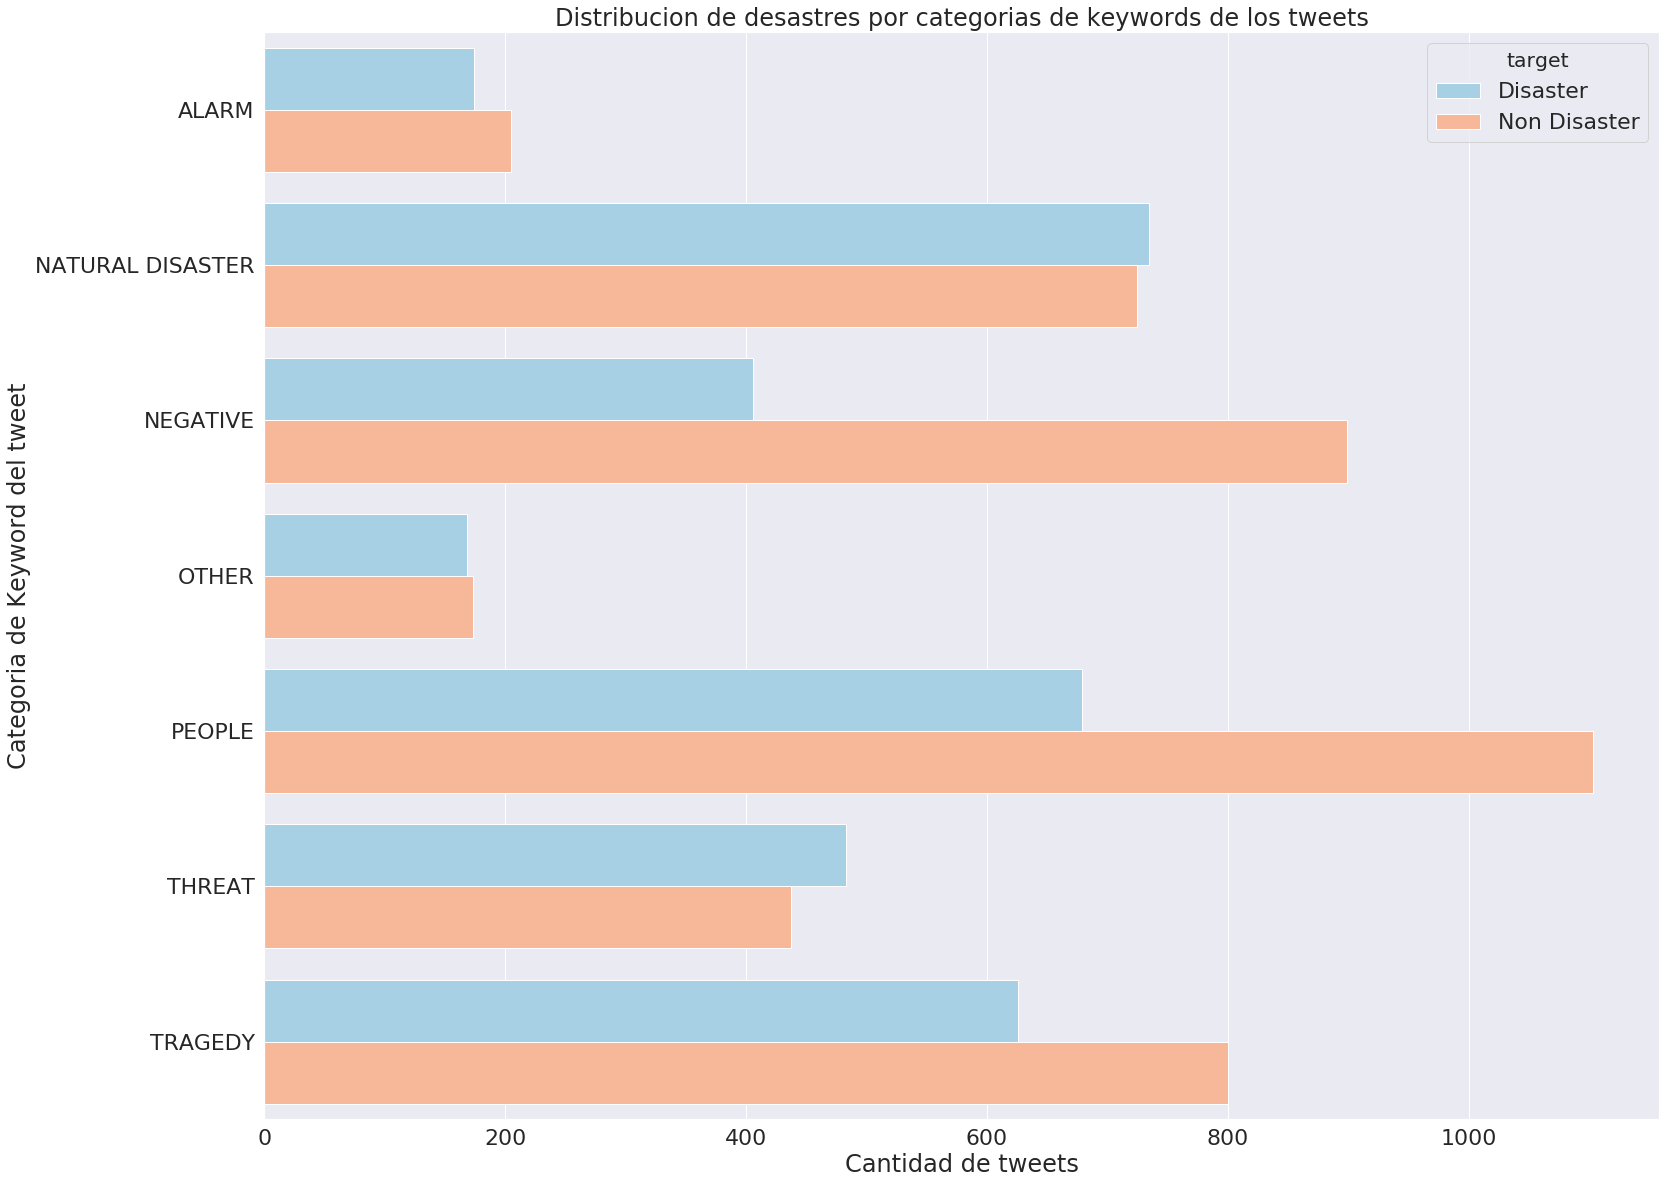

In [106]:
barplot(y = 'keyword category', x = 'amount', hue = 'target', 
        data = A_disasterTypesAmount,xLabel = 'Cantidad de tweets',yLabel = 'Categoria de Keyword del tweet',
        title = 'Distribucion de desastres por categorias de keywords de los tweets', figY = 20,
        palette = 'RdBu_r', fontSize = 2)

In [107]:
#CALCULANDO LA PROBABILIDAD CONDICIONAL DE DESASTRE O NO DESASTRE DADO QUE EL TWEET ES DE UNA CATEGORIA

A_categoriesConditionalProbabilitiesDisaster = {}
for category in A_keywordsCategoriesMap:

    p = probabilityOfGivenThat(lambda x : x['target'] == 'Disaster',
                               lambda x : x['keyword category'] == category,
                               A_tweets)
    addToDic(A_categoriesConditionalProbabilitiesDisaster,category,round(p * 100,2))
    
A_categoriesConditionalProbabilitiesDisasterDF = dicToDataFrame(A_categoriesConditionalProbabilitiesDisaster)
    
A_categoriesConditionalProbabilitiesDisasterDF['target'] = 'Disaster'
    
A_categoriesConditionalProbabilitiesNonDisaster = {}
for category in A_keywordsCategoriesMap:

    p = probabilityOfGivenThat(lambda x : x['target'] == 'Non Disaster',
                               lambda x : x['keyword category'] == category,
                               A_tweets)
    addToDic(A_categoriesConditionalProbabilitiesNonDisaster,category,round(p * 100,2))
    
A_categoriesConditionalProbabilitiesNonDisasterDF = dicToDataFrame(A_categoriesConditionalProbabilitiesNonDisaster)

A_categoriesConditionalProbabilitiesNonDisasterDF['target'] = 'Non Disaster'

A_categoriesConditionalProbabilities = pd.concat([A_categoriesConditionalProbabilitiesNonDisasterDF,A_categoriesConditionalProbabilitiesDisasterDF])

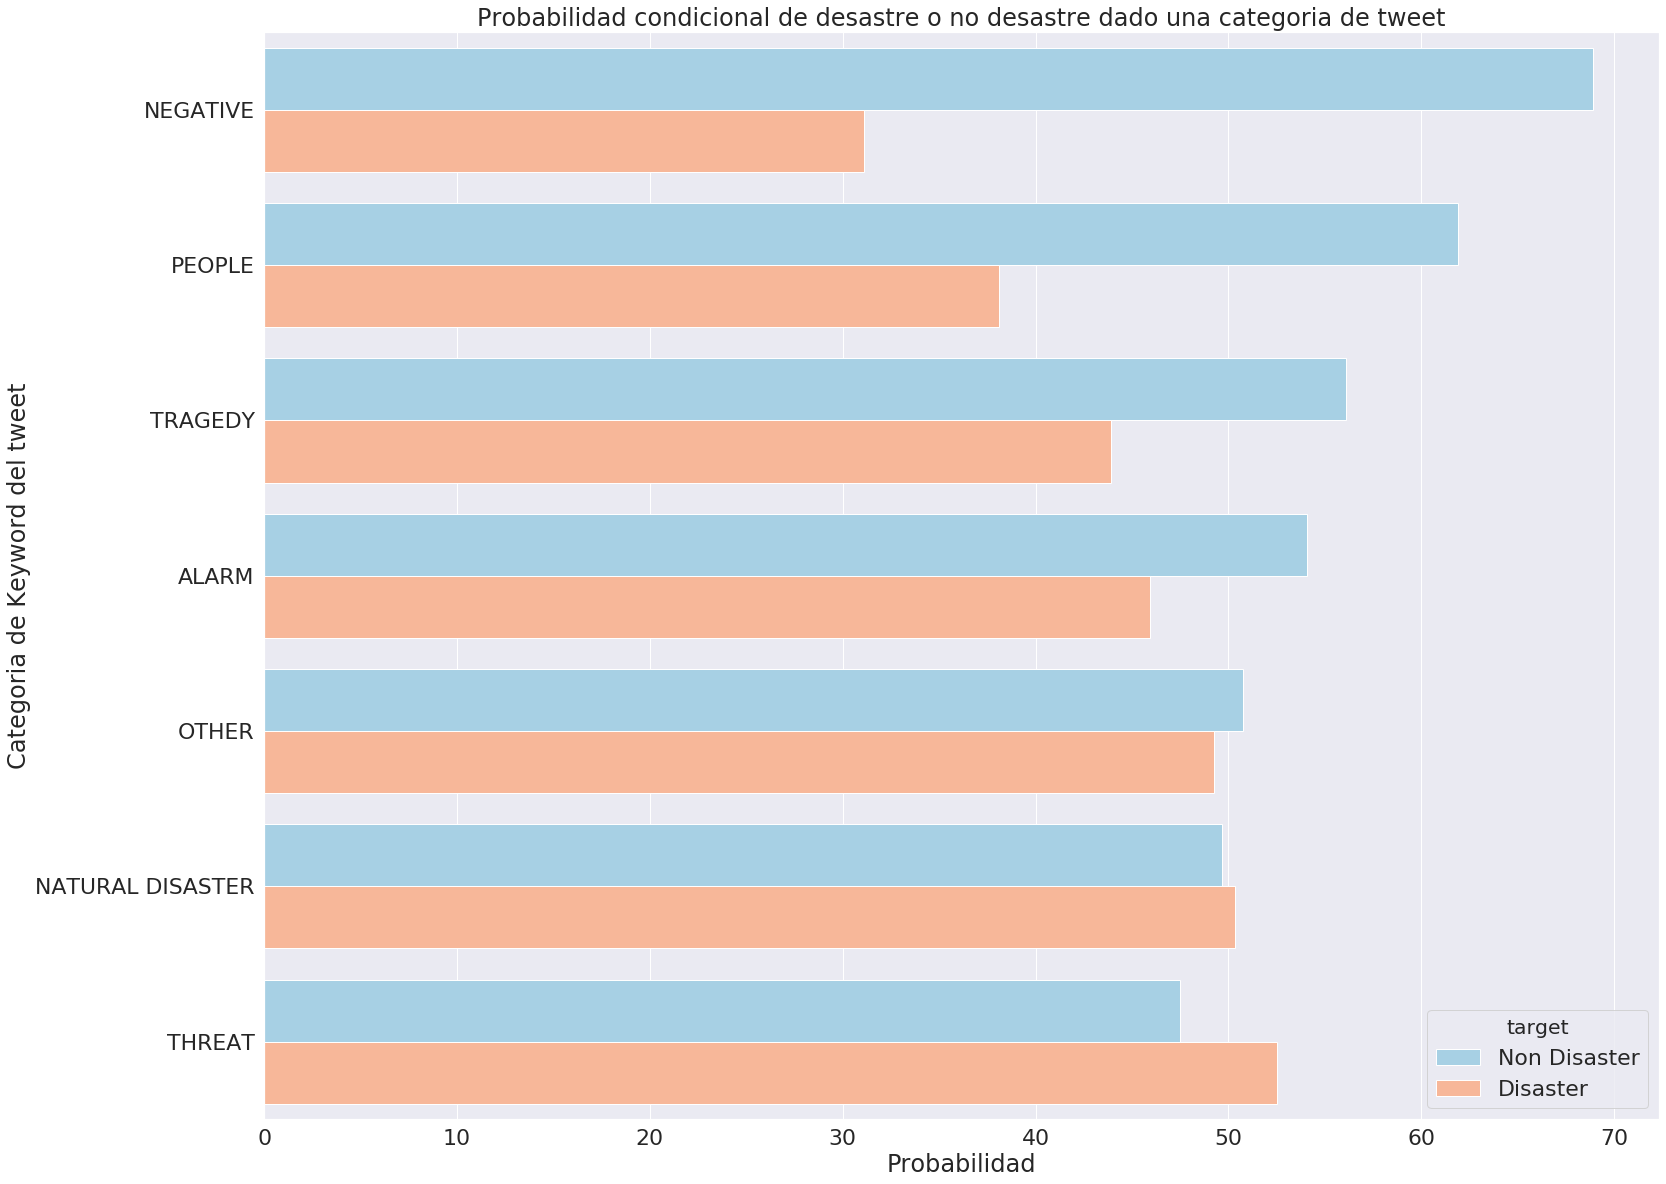

In [108]:
barplot(y = 'keys', x = 'values', hue = 'target', data = A_categoriesConditionalProbabilities,
        xLabel = 'Probabilidad',yLabel = 'Categoria de Keyword del tweet',
        title = 'Probabilidad condicional de desastre o no desastre dado una categoria de tweet', figY = 20,
        palette = 'RdBu_r', fontSize = 2)

# CONCLUSION
    
    Una conclusion inesperada de este plot es que (por lo menos en esta forma de categorizar los keywords y asumiendo que estos keywords de alguna forma encapsulan la idea de 'tema' te un tweet) no parece haber algun tema que sea un indicador claro de desastre.
    
    Esto se puede ver bastante claro quizas en el primer plot de todos que muestra que los 20 keywords mas usados son usados en no mas de 50 tweets habiendo de estos cerca de 7000!
    
    Mas aun. Si algo nos deja esta categorizacion es que esta sirve mas bien para detectar 'no desastres'. Por ejemplo tenemos que dado que la probabilidad de que un tweet sea un no desastre dado que su categoria sea PEOPLE o NEGATIVE es un poco mas alta que el resto